## Deep Learning

In [11]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers, models
from get_processed_data import get_processed_data
import seaborn as sns
from scikeras.wrappers import KerasClassifier
from tensorflow import keras
from sampling import undersample, oversample, smote, ncr
from show_metrics import show_metrics_DL
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, roc_curve, auc, confusion_matrix,
    roc_auc_score, precision_recall_curve
)
from feature_selection import forward_select, backward_select, rf_select

### Splitting data

In [12]:
df4, X_train, y_train, X_val, y_val, X_test, y_test = get_processed_data()
# X_train.to_csv(r"C:\Users\760421\Downloads\P_FAILING_HEAD.csv", index=False)


Training set shape: (12335, 57) (12335,)
Validation set shape: (1542, 57) (1542,)
Test set shape: (1542, 57) (1542,)


In [13]:
def ann(optimizer='adam', activation='relu', dropout_rate=0.0, hidden_units=16, learning_rate=0.01):
    model = keras.Sequential()
    model.add(layers.Dense(hidden_units, activation=activation, input_shape=(X_train.shape[1],)))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model



def train_ann(X_train, y_train, X_test, y_test, sampling_technique):

    model = KerasClassifier(build_fn=ann, optimizer='adam', activation='relu', dropout_rate=0.0, 
                            hidden_units=16, learning_rate=0.01, batch_size=32, epochs=30)
    # model = KerasClassifier(build_fn=ann, optimizer='adam', activation='relu', dropout_rate=0.1, 
    #                         hidden_units=32, learning_rate=0.1, batch_size=32, epochs=40)

    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_pred_classes = [1 if i>0.5 else 0 for i in y_pred]

   
    print("Classification Report:")
    print(classification_report(y_test, y_pred_classes))
    
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    Recall = round(recall_score(y_test, y_pred),3)
    Precision = round(precision_score(y_test, y_pred),3)
    f1 = round(f1_score(y_test, y_pred),3)
    accuracy = round(accuracy_score(y_test, y_pred),3)
    
    metrics = [sampling_technique, Recall, Precision, f1,accuracy]
    # Generate ROC curve and calculate AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_classes)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve ({sampling_technique})')
    plt.legend(loc='lower right')
    plt.show()
        
    return metrics



Epoch 1/30


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


726/726 [==============================] - 2s 2ms/step - loss: 0.5754 - accuracy: 0.7048
Epoch 2/30
726/726 [==============================] - 1s 1ms/step - loss: 0.5074 - accuracy: 0.7613
Epoch 3/30
726/726 [==============================] - 1s 1ms/step - loss: 0.4928 - accuracy: 0.7644
Epoch 4/30
726/726 [==============================] - 1s 1ms/step - loss: 0.4840 - accuracy: 0.7655
Epoch 5/30
726/726 [==============================] - 1s 1ms/step - loss: 0.4763 - accuracy: 0.7702
Epoch 6/30
726/726 [==============================] - 1s 2ms/step - loss: 0.4656 - accuracy: 0.7753
Epoch 7/30
726/726 [==============================] - 1s 2ms/step - loss: 0.4559 - accuracy: 0.7799
Epoch 8/30
726/726 [==============================] - 1s 2ms/step - loss: 0.4469 - accuracy: 0.7877
Epoch 9/30
726/726 [==============================] - 1s 2ms/step - loss: 0.4381 - accuracy: 0.7957
Epoch 10/30
726/726 [==============================] - 1s 2ms/step - loss: 0.4317 - accuracy: 0.7984
Epoch 11/3

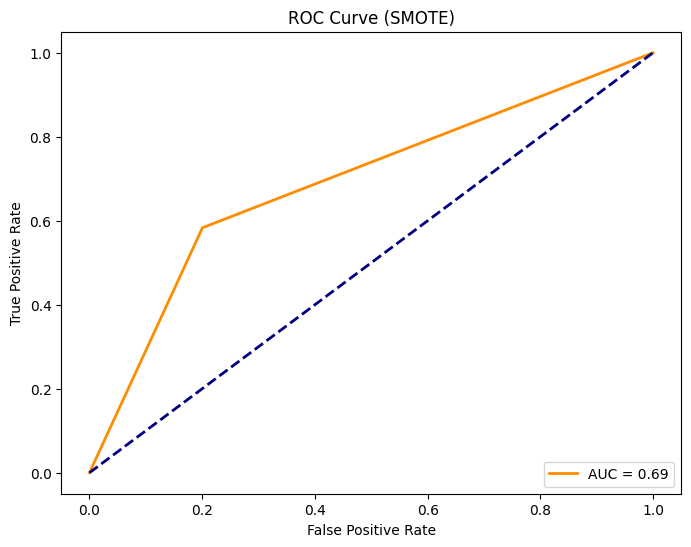

Epoch 1/30


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


726/726 [==============================] - 2s 2ms/step - loss: 0.5754 - accuracy: 0.7047
Epoch 2/30
726/726 [==============================] - 1s 2ms/step - loss: 0.5194 - accuracy: 0.7466
Epoch 3/30
726/726 [==============================] - 1s 2ms/step - loss: 0.5014 - accuracy: 0.7547
Epoch 4/30
726/726 [==============================] - 1s 2ms/step - loss: 0.4887 - accuracy: 0.7614
Epoch 5/30
726/726 [==============================] - 1s 2ms/step - loss: 0.4774 - accuracy: 0.7672
Epoch 6/30
726/726 [==============================] - 1s 2ms/step - loss: 0.4682 - accuracy: 0.7748
Epoch 7/30
726/726 [==============================] - 1s 2ms/step - loss: 0.4605 - accuracy: 0.7800
Epoch 8/30
726/726 [==============================] - 1s 2ms/step - loss: 0.4539 - accuracy: 0.7841
Epoch 9/30
726/726 [==============================] - 1s 2ms/step - loss: 0.4471 - accuracy: 0.7883
Epoch 10/30
726/726 [==============================] - 1s 2ms/step - loss: 0.4402 - accuracy: 0.7920
Epoch 11/3

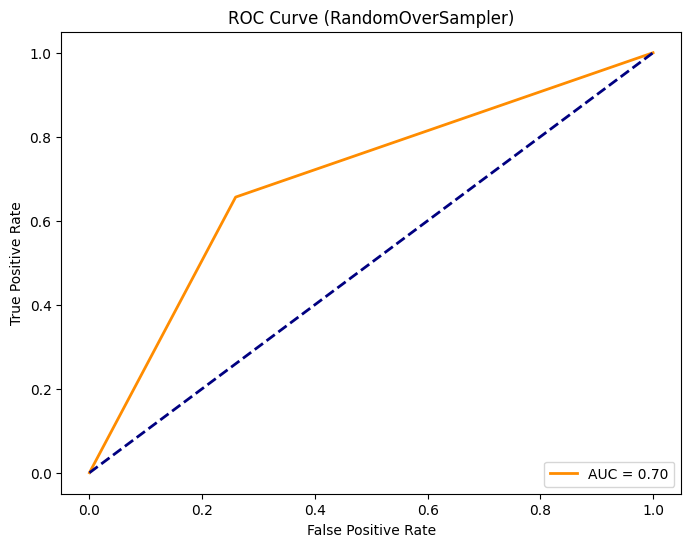

Epoch 1/30


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


46/46 [==============================] - 1s 2ms/step - loss: 0.6905 - accuracy: 0.5401
Epoch 2/30
46/46 [==============================] - 0s 2ms/step - loss: 0.6422 - accuracy: 0.6367
Epoch 3/30
46/46 [==============================] - 0s 2ms/step - loss: 0.6101 - accuracy: 0.6851
Epoch 4/30
46/46 [==============================] - 0s 2ms/step - loss: 0.5897 - accuracy: 0.6885
Epoch 5/30
46/46 [==============================] - 0s 2ms/step - loss: 0.5724 - accuracy: 0.7079
Epoch 6/30
46/46 [==============================] - 0s 3ms/step - loss: 0.5602 - accuracy: 0.7251
Epoch 7/30
46/46 [==============================] - 0s 2ms/step - loss: 0.5527 - accuracy: 0.7334
Epoch 8/30
46/46 [==============================] - 0s 2ms/step - loss: 0.5448 - accuracy: 0.7376
Epoch 9/30
46/46 [==============================] - 0s 2ms/step - loss: 0.5365 - accuracy: 0.7514
Epoch 10/30
46/46 [==============================] - 0s 2ms/step - loss: 0.5310 - accuracy: 0.7576
Epoch 11/30
46/46 [===========

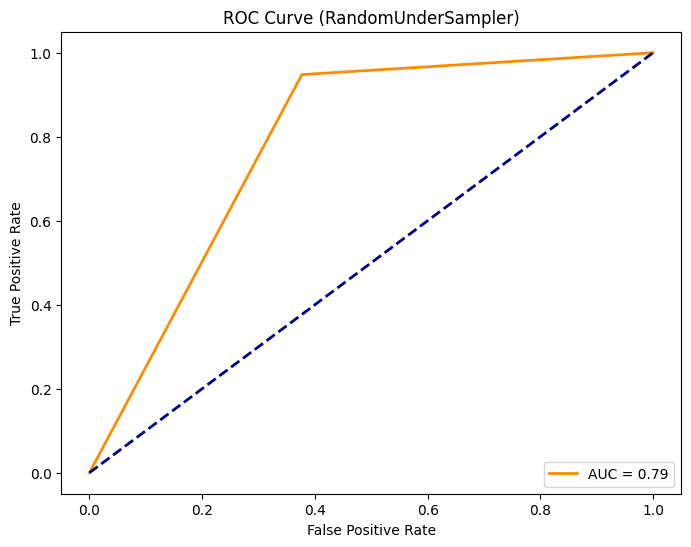

In [14]:
results={}

#smote
X_smote, y_smote = smote(X_train, y_train)

metrics = train_ann(X_smote, y_smote, X_val,y_val,'SMOTE')
results[metrics[0]] = metrics[1:]

#oversampling
X_over, y_over = oversample(X_train, y_train)

metrics = train_ann(X_over, y_over, X_val,y_val,'RandomOverSampler')
results[metrics[0]] = metrics[1:]

#undersampling
X_under, y_under = undersample(X_train, y_train)

metrics = train_ann(X_under, y_under, X_val,y_val,'RandomUnderSampler')
results[metrics[0]] = metrics[1:]



In [15]:
sampling_techniques = list(results.keys())
metrics = ['Recall', 'Precision', 'F1 Score', 'Accuracy']
results_df = pd.DataFrame.from_dict(results, orient='index', columns=metrics)
sorted_df = results_df.sort_values(by=['Recall','F1 Score', 'Precision', 'Accuracy'], ascending=False)
sorted_df

,Recall,Precision,F1 Score,Accuracy
RandomUnderSampler,0.948,0.143,0.249,0.643
RandomOverSampler,0.656,0.144,0.236,0.735
SMOTE,0.583,0.162,0.253,0.786


In [16]:
features = rf_select(X_train, y_train)
X_train_rf = X_train[features]
X_val_rf = X_val[features]
X_test_rf = X_test[features]
print(X_train_rf.shape)
print(y_train.shape)


33
Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make_Honda', 'Make_Toyota',
       'Make_Mazda', 'Make_Chevrolet', 'Make_Pontiac', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus_Single', 'MaritalStatus_Married', 'Age', 'Fault',
       'VehicleCategory_Sedan', 'VehiclePrice', 'RepNumber', 'Deductible',
       'DriverRating', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'NumberOfSuppliments', 'AddressChange-Claim',
       'NumberOfCars', 'Year', 'BasePolicy_Liability', 'BasePolicy_Collision',
       'BasePolicy_All Perils', 'Weekend'],
      dtype='object')
(12335, 33)
(12335,)


In [17]:
def ann_rf(optimizer='adam', activation='relu', dropout_rate=0.0, hidden_units=16, learning_rate=0.01):
    model = keras.Sequential()
    model.add(layers.Dense(hidden_units, activation=activation, input_shape=(X_train_rf.shape[1],)))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

def train_ann_rf(X_train, y_train, X_test, y_test, sampling_technique):

    model = KerasClassifier(build_fn=ann_rf, optimizer='adam', activation='relu', dropout_rate=0.0, 
                            hidden_units=16, learning_rate=0.01, batch_size=32, epochs=30)
    # model = KerasClassifier(build_fn=ann, optimizer='adam', activation='relu', dropout_rate=0.1, 
    #                         hidden_units=32, learning_rate=0.1, batch_size=32, epochs=40)

    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_pred_classes = [1 if i>0.5 else 0 for i in y_pred]

   
    print("Classification Report:")
    print(classification_report(y_test, y_pred_classes))
    
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    Recall = round(recall_score(y_test, y_pred),3)
    Precision = round(precision_score(y_test, y_pred),3)
    f1 = round(f1_score(y_test, y_pred),3)
    accuracy = round(accuracy_score(y_test, y_pred),3)
    
    metrics = [sampling_technique, Recall, Precision, f1,accuracy]
    # Generate ROC curve and calculate AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_classes)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve ({sampling_technique})')
    plt.legend(loc='lower right')
    plt.show()
        
    return metrics

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/30
726/726 [==============================] - 2s 2ms/step - loss: 0.5799 - accuracy: 0.7166
Epoch 2/30
726/726 [==============================] - 1s 2ms/step - loss: 0.5084 - accuracy: 0.7605
Epoch 3/30
726/726 [==============================] - 2s 2ms/step - loss: 0.4874 - accuracy: 0.7669
Epoch 4/30
726/726 [==============================] - 2s 3ms/step - loss: 0.4715 - accuracy: 0.7736
Epoch 5/30
726/726 [==============================] - 2s 3ms/step - loss: 0.4584 - accuracy: 0.7781
Epoch 6/30
726/726 [==============================] - 2s 2ms/step - loss: 0.4481 - accuracy: 0.7870
Epoch 7/30
726/726 [==============================] - 2s 2ms/step - loss: 0.4397 - accuracy: 0.7942
Epoch 8/30
726/726 [==============================] - 1s 2ms/step - loss: 0.4316 - accuracy: 0.7989
Epoch 9/30
726/726 [==============================] - 2s 2ms/step - loss: 0.4257 - accuracy: 0.8029
Epoch 10/30
726/726 [==============================] - 1s 2ms/step - loss: 0.4202 - accuracy: 0.8077

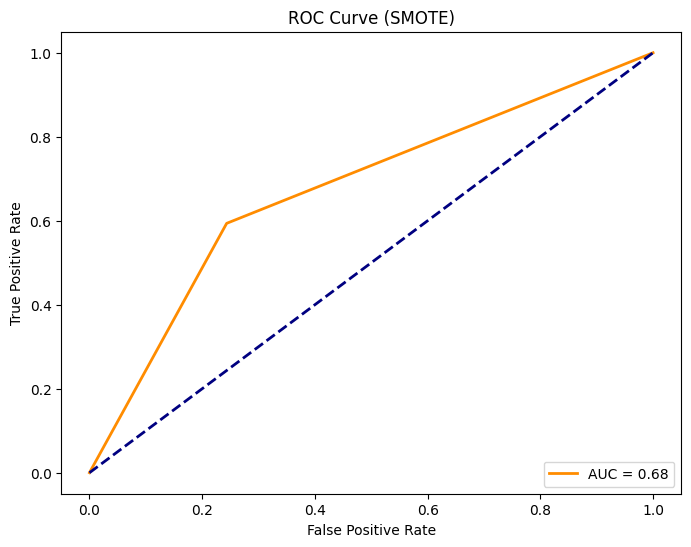

Epoch 1/30


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


726/726 [==============================] - 2s 2ms/step - loss: 0.5893 - accuracy: 0.6956
Epoch 2/30
726/726 [==============================] - 1s 2ms/step - loss: 0.5193 - accuracy: 0.7507
Epoch 3/30
726/726 [==============================] - 2s 2ms/step - loss: 0.5018 - accuracy: 0.7564
Epoch 4/30
726/726 [==============================] - 2s 2ms/step - loss: 0.4875 - accuracy: 0.7657
Epoch 5/30
726/726 [==============================] - 2s 2ms/step - loss: 0.4757 - accuracy: 0.7713
Epoch 6/30
726/726 [==============================] - 2s 2ms/step - loss: 0.4652 - accuracy: 0.7785
Epoch 7/30
726/726 [==============================] - 2s 2ms/step - loss: 0.4562 - accuracy: 0.7832
Epoch 8/30
726/726 [==============================] - 2s 2ms/step - loss: 0.4491 - accuracy: 0.7870
Epoch 9/30
726/726 [==============================] - 2s 3ms/step - loss: 0.4431 - accuracy: 0.7891
Epoch 10/30
726/726 [==============================] - 2s 3ms/step - loss: 0.4382 - accuracy: 0.7927
Epoch 11/3

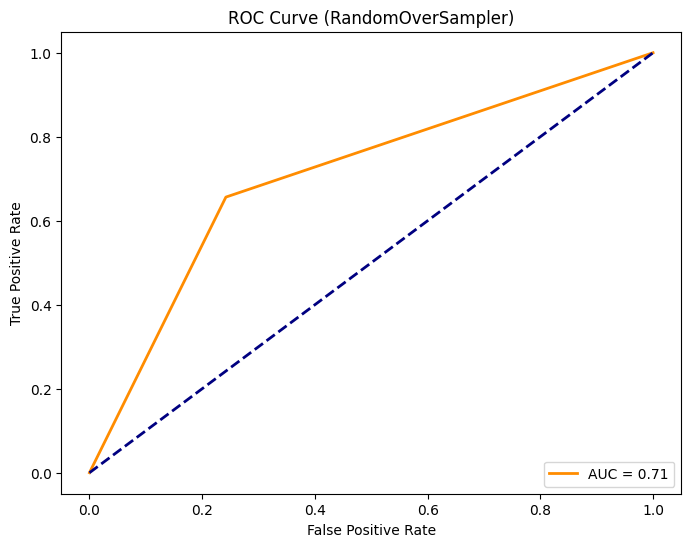

Epoch 1/30


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


46/46 [==============================] - 1s 4ms/step - loss: 0.6909 - accuracy: 0.5311
Epoch 2/30
46/46 [==============================] - 0s 3ms/step - loss: 0.6515 - accuracy: 0.6167
Epoch 3/30
46/46 [==============================] - 0s 2ms/step - loss: 0.6256 - accuracy: 0.6713
Epoch 4/30
46/46 [==============================] - 0s 2ms/step - loss: 0.6064 - accuracy: 0.6802
Epoch 5/30
46/46 [==============================] - 0s 2ms/step - loss: 0.5912 - accuracy: 0.6982
Epoch 6/30
46/46 [==============================] - 0s 2ms/step - loss: 0.5776 - accuracy: 0.6996
Epoch 7/30
46/46 [==============================] - 0s 2ms/step - loss: 0.5692 - accuracy: 0.7196
Epoch 8/30
46/46 [==============================] - 0s 2ms/step - loss: 0.5587 - accuracy: 0.7189
Epoch 9/30
46/46 [==============================] - 0s 2ms/step - loss: 0.5510 - accuracy: 0.7341
Epoch 10/30
46/46 [==============================] - 0s 2ms/step - loss: 0.5444 - accuracy: 0.7334
Epoch 11/30
46/46 [===========

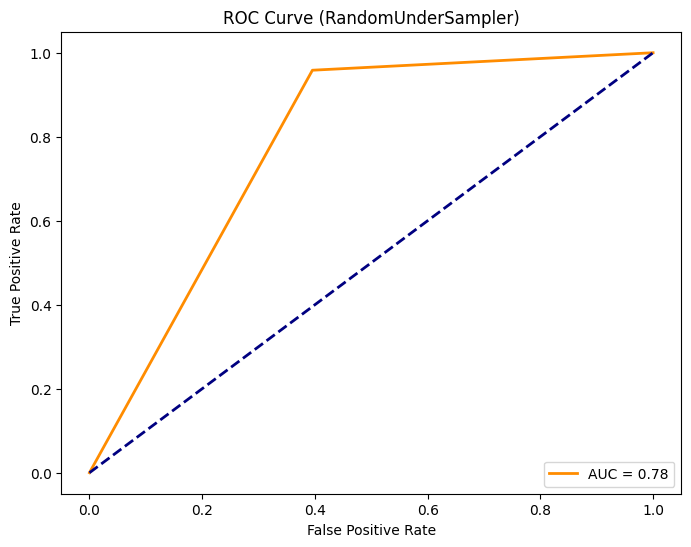

In [18]:
results={}

#smote
X_smote_rf, y_smote_rf = smote(X_train_rf, y_train)

metrics = train_ann_rf(X_smote_rf, y_smote_rf, X_val_rf,y_val,'SMOTE')
results[metrics[0]] = metrics[1:]

#oversampling
X_over_rf, y_over_rf = oversample(X_train_rf, y_train)

metrics = train_ann_rf(X_over_rf, y_over_rf, X_val_rf,y_val,'RandomOverSampler')
results[metrics[0]] = metrics[1:]

#undersampling
X_under_rf, y_under_rf = undersample(X_train_rf, y_train)

metrics = train_ann_rf(X_under_rf, y_under_rf, X_val_rf,y_val,'RandomUnderSampler')
results[metrics[0]] = metrics[1:]



In [19]:
sampling_techniques = list(results.keys())
metrics = ['Recall', 'Precision', 'F1 Score', 'Accuracy']
results_df = pd.DataFrame.from_dict(results, orient='index', columns=metrics)
sorted_df = results_df.sort_values(by=['Recall','F1 Score', 'Precision',  'Accuracy'], ascending=False)
sorted_df

,Recall,Precision,F1 Score,Accuracy
RandomUnderSampler,0.958,0.139,0.242,0.626
RandomOverSampler,0.656,0.153,0.248,0.752
SMOTE,0.594,0.139,0.226,0.746


```Hyper-Parameter Tuning```

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, recall_score

model = KerasClassifier(build_fn=ann, optimizer="adam", epochs=30, batch_size=32, verbose=0,activation = "relu", 
                        dropout_rate=0,hidden_units=16, learning_rate=0.01)

# Define the hyperparameters to tune
param_grid = {
    'optimizer': ['adam'],  # Optimizer choices
    'activation': ['relu', 'sigmoid'],  # Activation functions
    'hidden_units': [8, 16, 32],  # Number of neurons in the hidden layer(s)
    'learning_rate': [0.001, 0.01, 0.1],  # Learning rate for the optimizer
    'batch_size': [32],  # Batch size for training
    'epochs': [30],  # Number of training epochs
    'dropout_rate': [0.0, 0.1, 0.2],
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=make_scorer(recall_score), cv=3)
grid_result = grid.fit(X_under, y_under)

print("Without Feature Selection, Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point u

Without Feature Selection, Best: 0.904667 using {'activation': 'sigmoid', 'batch_size': 32, 'dropout_rate': 0.0, 'epochs': 30, 'hidden_units': 32, 'learning_rate': 0.01, 'optimizer': 'adam'}


In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score, recall_score

model = KerasClassifier(build_fn=ann_rf, optimizer="adam", epochs=30, batch_size=32, verbose=0,activation = "relu", 
                        dropout_rate=0,hidden_units=16, learning_rate=0.01)

# Define the hyperparameters to tune
param_grid = {
    'optimizer': ['adam'],  # Optimizer choices
    'activation': ['relu', 'sigmoid'],  # Activation functions
    'hidden_units': [8, 16, 32],  # Number of neurons in the hidden layer(s)
    'learning_rate': [0.001, 0.01, 0.1],  # Learning rate for the optimizer
    'batch_size': [32],  # Batch size for training
    'epochs': [30],  # Number of training epochs
    'dropout_rate': [0.0, 0.1, 0.2],
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=make_scorer(recall_score), cv=3)
grid_result = grid.fit(X_under_rf, y_under_rf)

print("With feature Selection, Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point u

With feature Selection, Best: 0.911606 using {'activation': 'sigmoid', 'batch_size': 32, 'dropout_rate': 0.1, 'epochs': 30, 'hidden_units': 8, 'learning_rate': 0.001, 'optimizer': 'adam'}


```Apply ANN Tuned model on test data (No Feature Selection)```

In [28]:
# Without Feature Selection, Best: 0.904667 using {'activation': 'sigmoid', 'batch_size': 32, 'dropout_rate': 0.0, 
#                                                  'epochs': 30, 'hidden_units': 32, 'learning_rate': 0.01, 
#                                                  'optimizer': 'adam'}
def train_ann_tuned(X_train, y_train, X_test, y_test, sampling_technique,class_weights=None,param_grid=None):

   
    model = KerasClassifier(build_fn=ann, optimizer='adam', activation='sigmoid', 
                            dropout_rate=0.0, hidden_units=32, learning_rate=0.01, 
                            batch_size=32, epochs=30)
    
    model.fit(X_train, y_train, class_weight=class_weights)
   
    
    y_pred = model.predict(X_test)
    y_pred_classes = [1 if i>0.5 else 0 for i in y_pred]

   
    print("Classification Report:")
    print(classification_report(y_test, y_pred_classes))
    
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    
    Recall = round(recall_score(y_test, y_pred),3)
    Precision = round(precision_score(y_test, y_pred),3)
    f1 = round(f1_score(y_test, y_pred),3)
    accuracy = round(accuracy_score(y_test, y_pred),3)
    
    metrics = [sampling_technique, Recall, Precision, f1,accuracy]
    # Generate ROC curve and calculate AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_classes)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve ({sampling_technique})')
    plt.legend(loc='lower right')
    plt.show()
        
    return metrics

Epoch 1/30


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


726/726 [==============================] - 2s 2ms/step - loss: 0.5962 - accuracy: 0.7026
Epoch 2/30
726/726 [==============================] - 1s 2ms/step - loss: 0.5290 - accuracy: 0.7522
Epoch 3/30
726/726 [==============================] - 1s 2ms/step - loss: 0.5102 - accuracy: 0.7604
Epoch 4/30
726/726 [==============================] - 1s 2ms/step - loss: 0.5034 - accuracy: 0.7592
Epoch 5/30
726/726 [==============================] - 1s 2ms/step - loss: 0.5002 - accuracy: 0.7597
Epoch 6/30
726/726 [==============================] - 1s 2ms/step - loss: 0.4983 - accuracy: 0.7592
Epoch 7/30
726/726 [==============================] - 1s 2ms/step - loss: 0.4959 - accuracy: 0.7609
Epoch 8/30
726/726 [==============================] - 1s 2ms/step - loss: 0.4937 - accuracy: 0.7598
Epoch 9/30
726/726 [==============================] - 1s 2ms/step - loss: 0.4908 - accuracy: 0.7618
Epoch 10/30
726/726 [==============================] - 1s 2ms/step - loss: 0.4873 - accuracy: 0.7627
Epoch 11/3

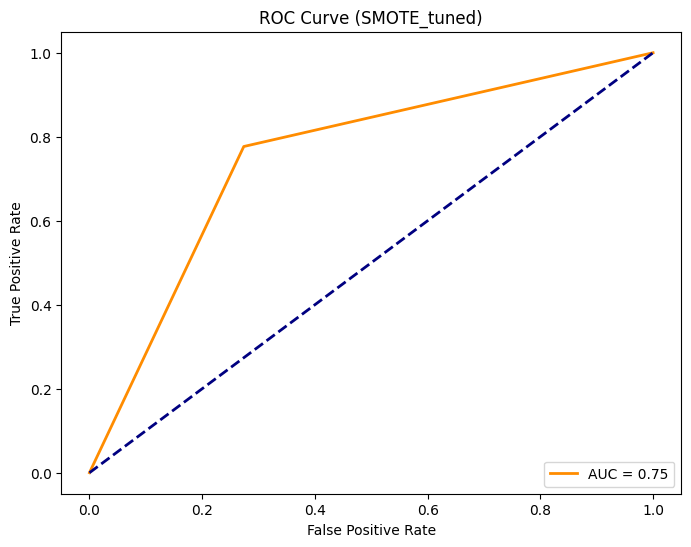

Epoch 1/30


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


726/726 [==============================] - 2s 2ms/step - loss: 0.6003 - accuracy: 0.7015
Epoch 2/30
726/726 [==============================] - 2s 2ms/step - loss: 0.5382 - accuracy: 0.7408
Epoch 3/30
726/726 [==============================] - 1s 2ms/step - loss: 0.5217 - accuracy: 0.7470
Epoch 4/30
726/726 [==============================] - 1s 2ms/step - loss: 0.5153 - accuracy: 0.7485
Epoch 5/30
726/726 [==============================] - 2s 2ms/step - loss: 0.5117 - accuracy: 0.7480
Epoch 6/30
726/726 [==============================] - 2s 2ms/step - loss: 0.5098 - accuracy: 0.7482
Epoch 7/30
726/726 [==============================] - 1s 2ms/step - loss: 0.5076 - accuracy: 0.7494
Epoch 8/30
726/726 [==============================] - 1s 2ms/step - loss: 0.5055 - accuracy: 0.7507
Epoch 9/30
726/726 [==============================] - 1s 2ms/step - loss: 0.5031 - accuracy: 0.7511
Epoch 10/30
726/726 [==============================] - 1s 2ms/step - loss: 0.5008 - accuracy: 0.7511
Epoch 11/3

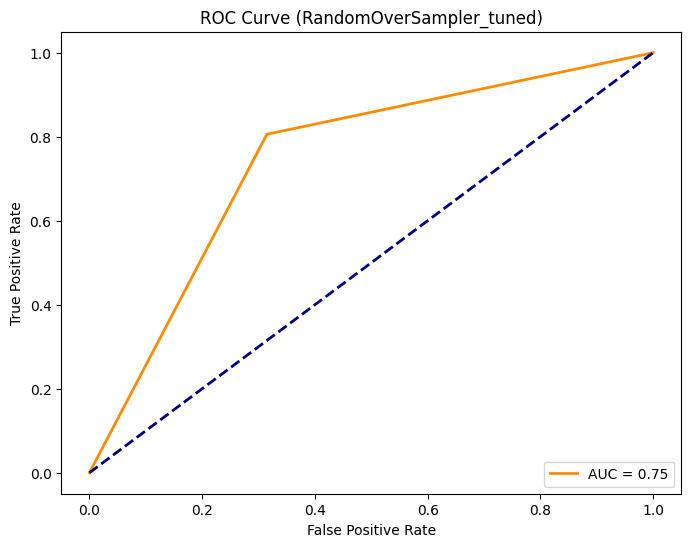

Epoch 1/30


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


46/46 [==============================] - 1s 2ms/step - loss: 0.6957 - accuracy: 0.5622
Epoch 2/30
46/46 [==============================] - 0s 2ms/step - loss: 0.6706 - accuracy: 0.6312
Epoch 3/30
46/46 [==============================] - 0s 2ms/step - loss: 0.6528 - accuracy: 0.6637
Epoch 4/30
46/46 [==============================] - 0s 2ms/step - loss: 0.6364 - accuracy: 0.6706
Epoch 5/30
46/46 [==============================] - 0s 2ms/step - loss: 0.6221 - accuracy: 0.6851
Epoch 6/30
46/46 [==============================] - 0s 2ms/step - loss: 0.6091 - accuracy: 0.6761
Epoch 7/30
46/46 [==============================] - 0s 2ms/step - loss: 0.5993 - accuracy: 0.7003
Epoch 8/30
46/46 [==============================] - 0s 2ms/step - loss: 0.5877 - accuracy: 0.6961
Epoch 9/30
46/46 [==============================] - 0s 2ms/step - loss: 0.5806 - accuracy: 0.7079
Epoch 10/30
46/46 [==============================] - 0s 2ms/step - loss: 0.5719 - accuracy: 0.7203
Epoch 11/30
46/46 [===========

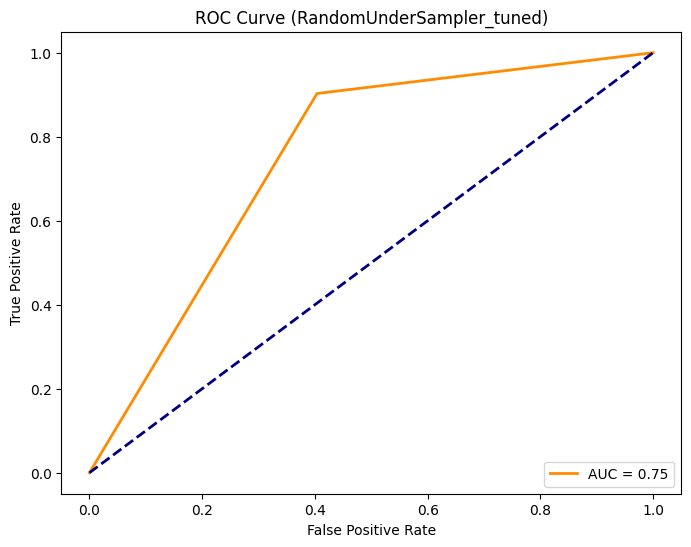

In [29]:
results={}

#smote
X_smote, y_smote = smote(X_train, y_train)

metrics = train_ann_tuned(X_smote, y_smote, X_test, y_test,'SMOTE_tuned')
results[metrics[0]] = metrics[1:]

#oversampling
X_over, y_over = oversample(X_train, y_train)

metrics = train_ann_tuned(X_over, y_over, X_test, y_test,'RandomOverSampler_tuned')
results[metrics[0]] = metrics[1:]

#undersampling
X_under, y_under = undersample(X_train, y_train)

metrics = train_ann_tuned(X_under, y_under, X_test, y_test,'RandomUnderSampler_tuned')
results[metrics[0]] = metrics[1:]

In [30]:
sampling_techniques = list(results.keys())
metrics = ['Recall', 'Precision', 'F1 Score', 'Accuracy']
results_df = pd.DataFrame.from_dict(results, orient='index', columns=metrics)
sorted_df = results_df.sort_values(by=['Recall','F1 Score', 'Precision', 'Accuracy'], ascending=False)
sorted_df

,Recall,Precision,F1 Score,Accuracy
RandomUnderSampler_tuned,0.903,0.138,0.239,0.617
RandomOverSampler_tuned,0.806,0.155,0.260,0.693
SMOTE_tuned,0.777,0.169,0.277,0.730


```Apply ANN Tuned model on test data (With Feature Selection)```

In [31]:
# With feature Selection, Best: 0.911606 using {'activation': 'sigmoid', 'batch_size': 32, 
#                                               'dropout_rate': 0.1, 'epochs': 30, 'hidden_units': 8, 
#                                               'learning_rate': 0.001, 'optimizer': 'adam'}
def train_ann_tuned_fs(X_train, y_train, X_test, y_test, sampling_technique,class_weights=None,param_grid=None):

   
    model = KerasClassifier(build_fn=ann_rf, optimizer='adam', activation='sigmoid', 
                            dropout_rate=0.1, hidden_units=8, learning_rate=0.001, 
                            batch_size=32, epochs=30)
    
    model.fit(X_train, y_train, class_weight=class_weights)
   
    
    y_pred = model.predict(X_test)
    y_pred_classes = [1 if i>0.5 else 0 for i in y_pred]

   
    print("Classification Report:")
    print(classification_report(y_test, y_pred_classes))
    
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    
    Recall = round(recall_score(y_test, y_pred),3)
    Precision = round(precision_score(y_test, y_pred),3)
    f1 = round(f1_score(y_test, y_pred),3)
    accuracy = round(accuracy_score(y_test, y_pred),3)
    
    metrics = [sampling_technique, Recall, Precision, f1,accuracy]
    # Generate ROC curve and calculate AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_classes)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve ({sampling_technique})')
    plt.legend(loc='lower right')
    plt.show()
        
    return metrics

#### Apply tuned model to training sets 

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/30
726/726 [==============================] - 2s 2ms/step - loss: 0.6515 - accuracy: 0.6279
Epoch 2/30
726/726 [==============================] - 1s 2ms/step - loss: 0.5812 - accuracy: 0.7129
Epoch 3/30
726/726 [==============================] - 2s 2ms/step - loss: 0.5489 - accuracy: 0.7367
Epoch 4/30
726/726 [==============================] - 1s 2ms/step - loss: 0.5362 - accuracy: 0.7439
Epoch 5/30
726/726 [==============================] - 2s 2ms/step - loss: 0.5261 - accuracy: 0.7486
Epoch 6/30
726/726 [==============================] - 2s 2ms/step - loss: 0.5200 - accuracy: 0.7506
Epoch 7/30
726/726 [==============================] - 2s 2ms/step - loss: 0.5158 - accuracy: 0.7516
Epoch 8/30
726/726 [==============================] - 1s 2ms/step - loss: 0.5101 - accuracy: 0.7511
Epoch 9/30
726/726 [==============================] - 1s 2ms/step - loss: 0.5060 - accuracy: 0.7527
Epoch 10/30
726/726 [==============================] - 1s 2ms/step - loss: 0.5030 - accuracy: 0.7530

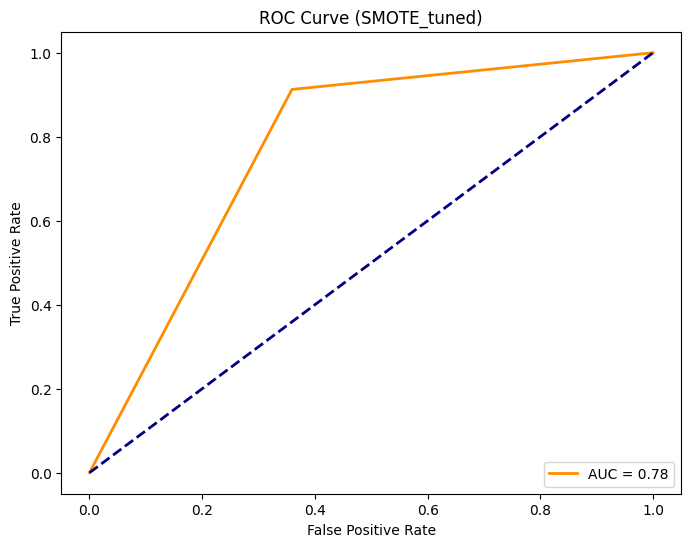

Epoch 1/30


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


726/726 [==============================] - 2s 2ms/step - loss: 0.6773 - accuracy: 0.5800
Epoch 2/30
726/726 [==============================] - 2s 2ms/step - loss: 0.6026 - accuracy: 0.6873
Epoch 3/30
726/726 [==============================] - 2s 2ms/step - loss: 0.5618 - accuracy: 0.7252
Epoch 4/30
726/726 [==============================] - 2s 2ms/step - loss: 0.5429 - accuracy: 0.7381
Epoch 5/30
726/726 [==============================] - 2s 2ms/step - loss: 0.5348 - accuracy: 0.7423
Epoch 6/30
726/726 [==============================] - 2s 2ms/step - loss: 0.5260 - accuracy: 0.7443
Epoch 7/30
726/726 [==============================] - 2s 2ms/step - loss: 0.5235 - accuracy: 0.7439
Epoch 8/30
726/726 [==============================] - 2s 2ms/step - loss: 0.5177 - accuracy: 0.7436
Epoch 9/30
726/726 [==============================] - 2s 2ms/step - loss: 0.5139 - accuracy: 0.7474
Epoch 10/30
726/726 [==============================] - 2s 2ms/step - loss: 0.5099 - accuracy: 0.7471
Epoch 11/3

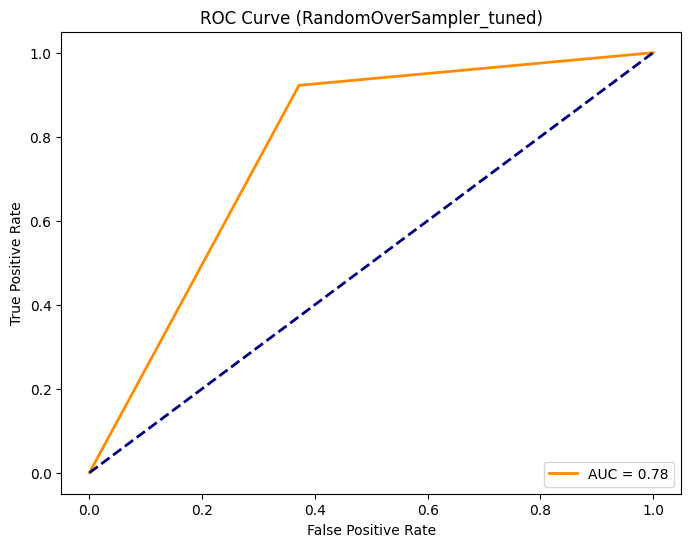

Epoch 1/30


c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


46/46 [==============================] - 1s 2ms/step - loss: 0.7129 - accuracy: 0.4869
Epoch 2/30
46/46 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5345
Epoch 3/30
46/46 [==============================] - 0s 3ms/step - loss: 0.6819 - accuracy: 0.5939
Epoch 4/30
46/46 [==============================] - 0s 2ms/step - loss: 0.6754 - accuracy: 0.6064
Epoch 5/30
46/46 [==============================] - 0s 2ms/step - loss: 0.6672 - accuracy: 0.6291
Epoch 6/30
46/46 [==============================] - 0s 2ms/step - loss: 0.6628 - accuracy: 0.6347
Epoch 7/30
46/46 [==============================] - 0s 2ms/step - loss: 0.6563 - accuracy: 0.6395
Epoch 8/30
46/46 [==============================] - 0s 2ms/step - loss: 0.6479 - accuracy: 0.6554
Epoch 9/30
46/46 [==============================] - 0s 2ms/step - loss: 0.6454 - accuracy: 0.6443
Epoch 10/30
46/46 [==============================] - 0s 2ms/step - loss: 0.6378 - accuracy: 0.6644
Epoch 11/30
46/46 [===========

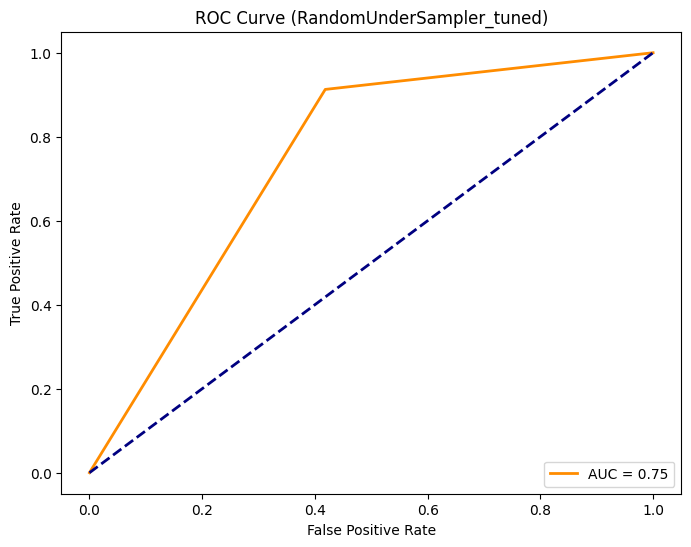

In [32]:
results={}

#smote
X_smote, y_smote = smote(X_train_rf, y_train)

metrics = train_ann_tuned_fs(X_smote, y_smote, X_test_rf, y_test,'SMOTE_tuned')
results[metrics[0]] = metrics[1:]

#oversampling
X_over, y_over = oversample(X_train_rf, y_train)

metrics = train_ann_tuned_fs(X_over, y_over, X_test_rf, y_test,'RandomOverSampler_tuned')
results[metrics[0]] = metrics[1:]

#undersampling
X_under, y_under = undersample(X_train_rf, y_train)

metrics = train_ann_tuned_fs(X_under, y_under, X_test_rf, y_test,'RandomUnderSampler_tuned')
results[metrics[0]] = metrics[1:]


In [33]:
sampling_techniques = list(results.keys())
metrics = ['Recall', 'Precision', 'F1 Score', 'Accuracy']
results_df = pd.DataFrame.from_dict(results, orient='index', columns=metrics)
sorted_df = results_df.sort_values(by=['Recall','F1 Score', 'Precision', 'Accuracy'], ascending=False)
sorted_df

,Recall,Precision,F1 Score,Accuracy
RandomOverSampler_tuned,0.922,0.151,0.259,0.648
SMOTE_tuned,0.913,0.154,0.263,0.659
RandomUnderSampler_tuned,0.913,0.135,0.235,0.604
